## Final Project Submission

* Student name: Erica Gabriel
* Student pace: Full Time
* Scheduled project review date/time: TBD
* Instructor name: Rafael Carrasco
* Blog post URL: https://medium.com/@gabriel.erica3/9-ways-companies-can-be-actionable-in-the-black-lives-matter-movement-83e9e2058821?sk=3570d30e1224139238f1cc186797ef16


## Target Audience of this Study:
### A Real Estate Company who wants to help sellers decide a price to sell their homes in Kings County
* What are the most/least expensive homes based on zipcodes (cheapest area to live in vs most expensive)?
* What's the lowest grade/condition with the highest profit (and vice versa)?
* Correlation/relationship between yr_built vs grade? (what age is considered vintage/"desirable old"?)
* Whats the best month/time of year for buying and selling? (build model to predict year)


## Part 1: CSV Import and Data Cleaning

In this section I analyzed and cleaned the 'kc_house_data.csv'. This dataset contains house sale prices for King County Washington sold between May 2014 - May 2015. The vities include, but are not limited to: Seattle, Renton, Redmond, Kent, etc.

The data cleaning step consisted of checking for Null & NaN values, extraneous values, placeholder data, and duplicates. The methods applied for treating the missing and extraneous data involved dropping columns whose impact on housing prices was neglible, replacing null and extraneous data with the columns respective mode values, and assigning column values to the best datatype compatible for use in our model.

In [16]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Inspect Data

In [17]:
#Load Dataset
data = pd.read_csv('kc_house_data.csv')
df = pd.DataFrame(data)
df_copy = df #Create a copy of the original dataframe to experiment with
df.head() #Display first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [18]:
df_copy['date'] = df_copy.date.astype('datetime64[ns]') #Convert the 'date' column to a datetime object

In [19]:
df.tail() #Display last 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [20]:
df.info() #Check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [21]:
df.nunique() #Get the number of unique values

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [22]:
for col in df.columns:
    print(col, '\n', df[col].value_counts().head(), '\n\n')

id 
 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64 


date 
 2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
Name: date, dtype: int64 


price 
 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64 


bedrooms 
 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64 


bathrooms 
 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64 


sqft_living 
 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64 


sqft_lot 
 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64 


floors 
 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64 


waterfront 
 0.0    19075
1.0      146
Name: waterfront, dtype: int64 


view 
 0.0    19422
2.0      957
3.0      508
1.0      

In [23]:
#Check for Duplicates
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [24]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning

In [26]:
print(df.isnull().sum()) #Get the sum of null values per column


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [27]:
df['waterfront'] = df['waterfront'].fillna(0.0) #Fill null values with mode value

In [28]:
df = df.drop(['view'], axis=1) #Drop view column because the effects on price are neglible

In [29]:
df.head() #Sanity Check

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [30]:
df['yr_renovated'] = df['yr_renovated'].fillna(0.0) #Fill null values with mode value

In [31]:
df.info() #Sanity Check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(11), object(1)
memory usage: 3.3+ MB


In [32]:
df['sqft_basement'] = df.sqft_basement.replace('?','0.0') #replace extraneous data with because we are unsure of the home has a basement

In [33]:
df = df.drop(15856, axis=0) #Outlier - 33 bedrooms, but 1.75 bath, and 1620 sqrt. Could be a typo

In [36]:
#Cols to drop lat, long, sqft_living15, sqft_lot15, id, these cols contrubte least to whether or not someone would buy a particular house
df = df.drop(['lat', 'long', 'sqft_living15', 'sqft_lot15', 'id'], axis=1)

In [37]:
df.head() #Sanity Check

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074


In [38]:
# Create new column 'is_renovated', where 1.0 represents houses that have been renovated and 0.0 represents houses that have not
df.loc[df['yr_renovated'] > 0.0 , 'is_renovated'] = 1.0

In [39]:
df['is_renovated'] = df['is_renovated'].fillna(0.0)

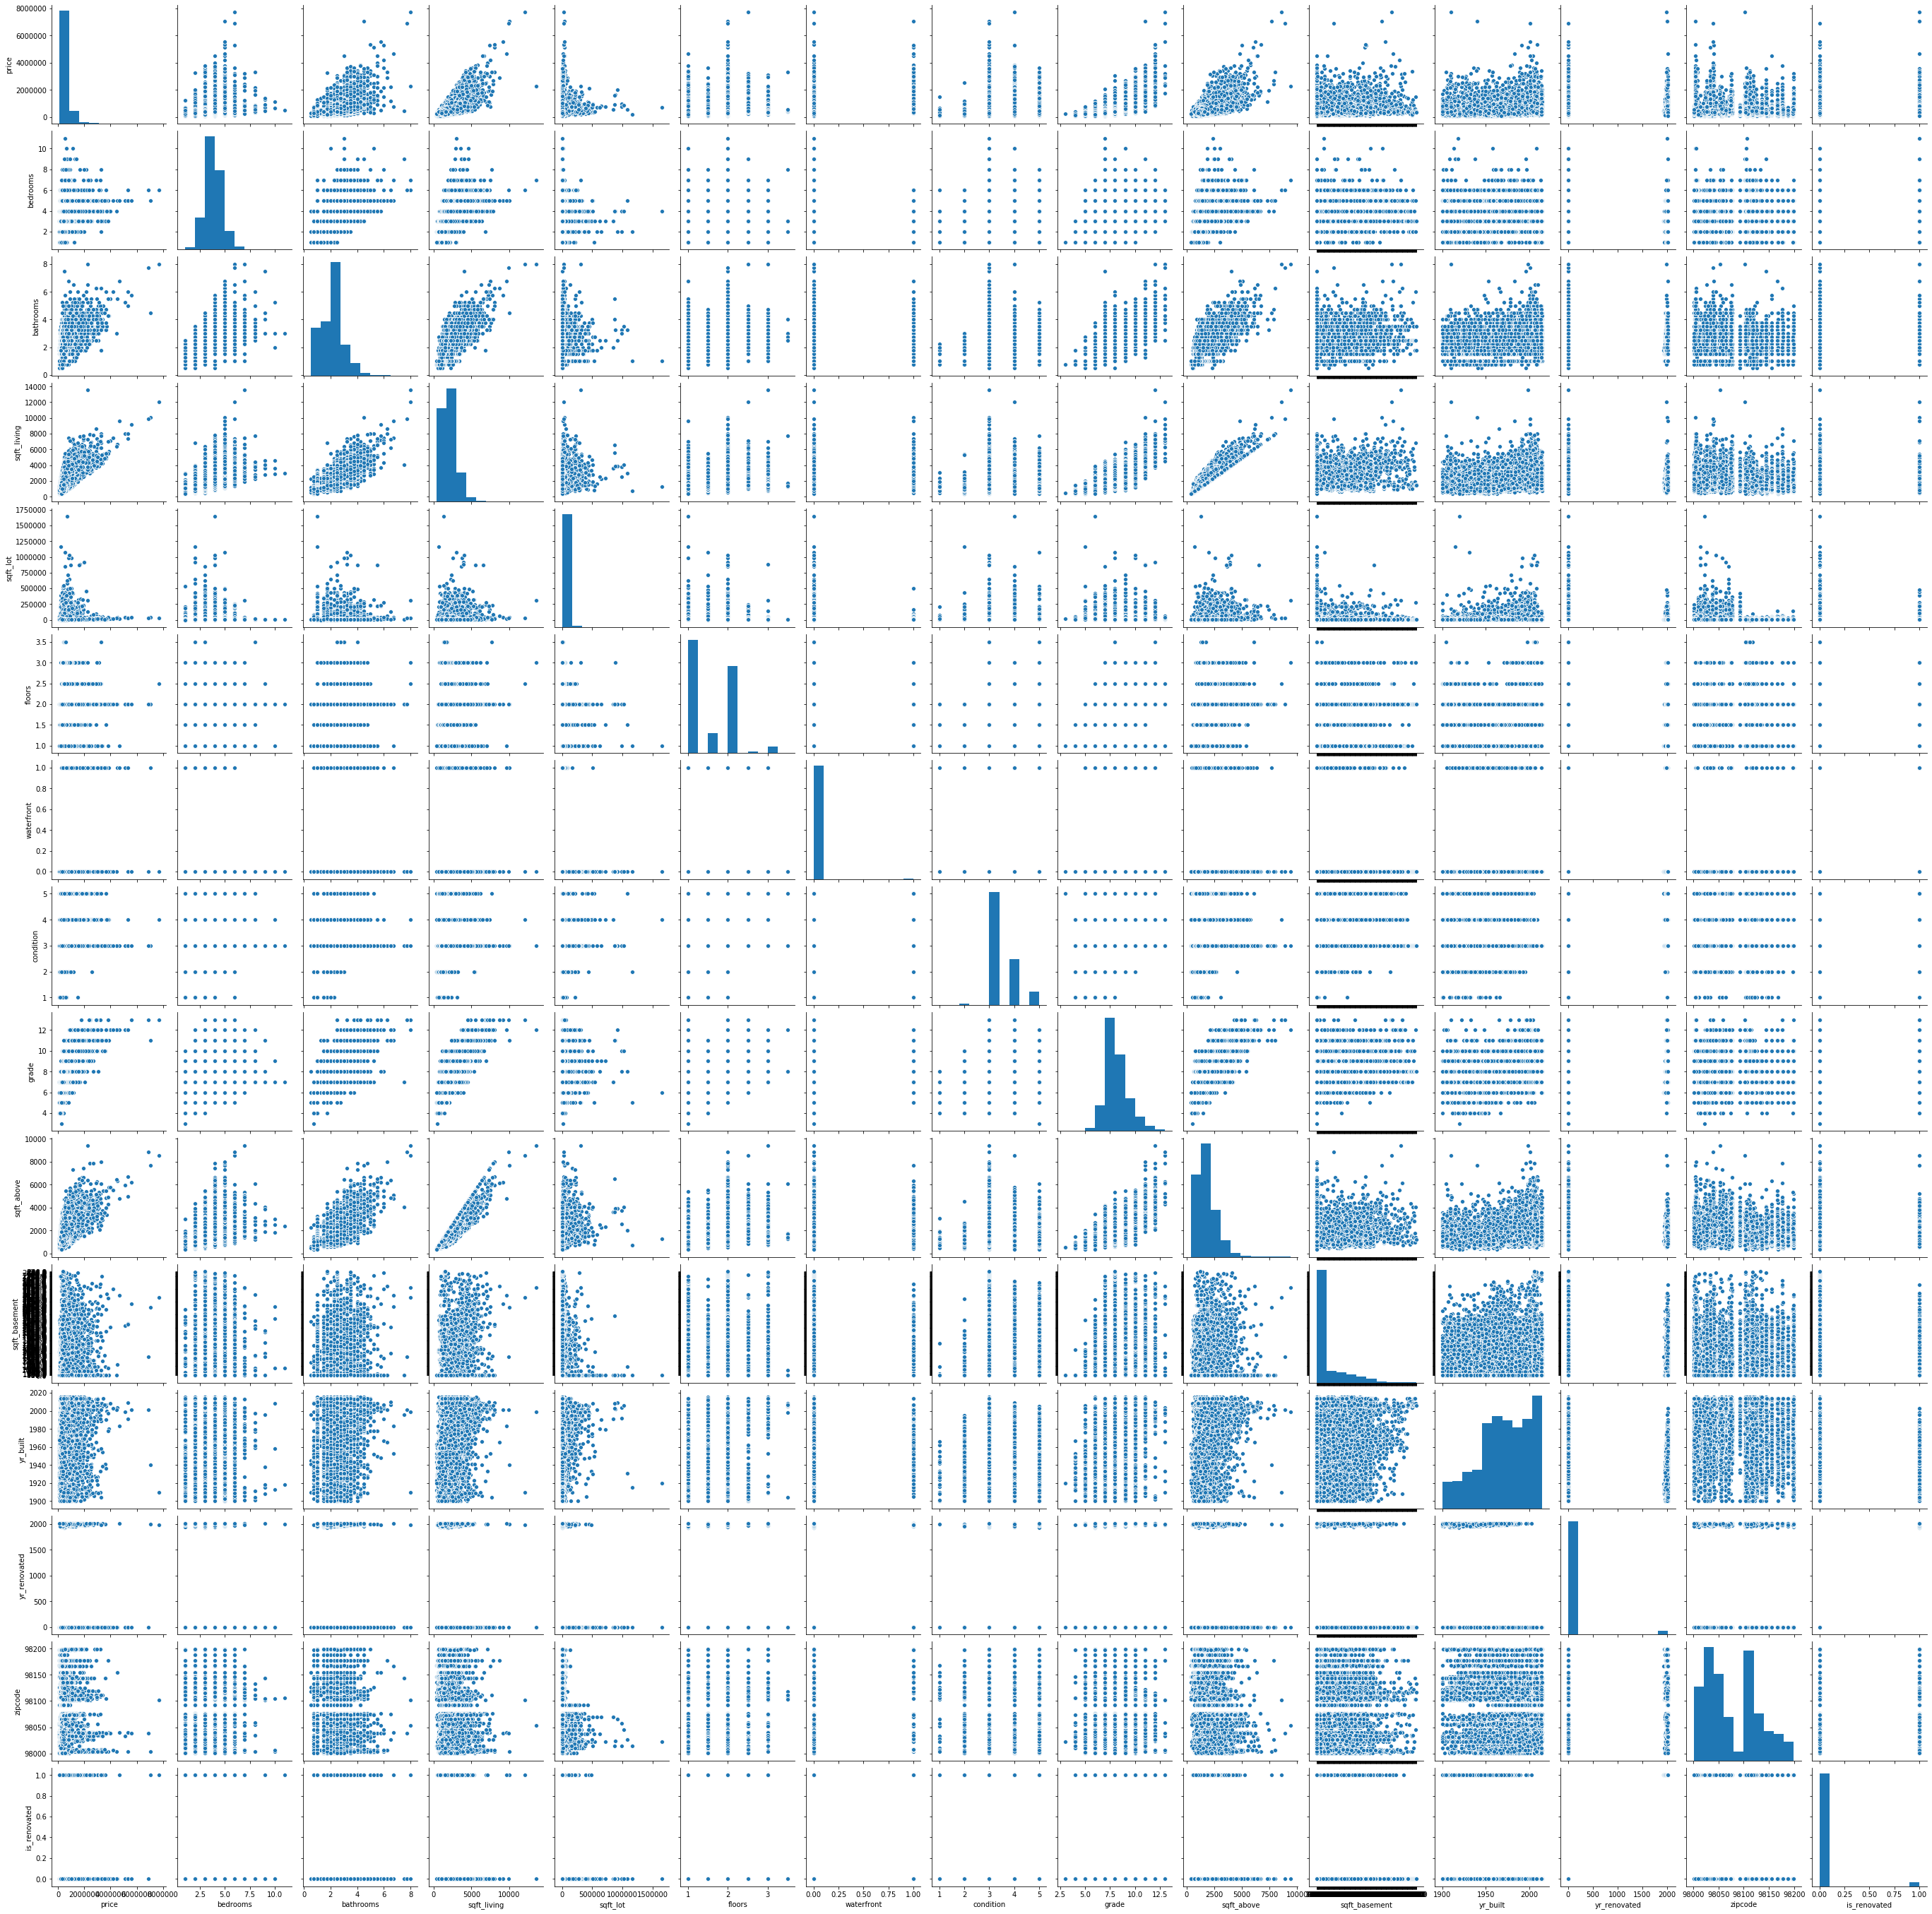

In [40]:
sns.pairplot(df) #Visual check for normality and linearity

In [41]:
df['sqft_basement'] = df['sqft_basement'].astype('float64') #convert sqft to dtype float fron object

In [42]:
df['date'] = df['date'].astype('datetime64[ns]') #Convert date to dtype datetime from object

In [43]:
df.info() #Final Check for Nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 16 columns):
date             21596 non-null datetime64[ns]
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
is_renovated     21596 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(8)
memory usage: 3.4 MB


## Part 2: Exploratory Data Anaylsis
In this section, The data was explored and analyzed by:

* Dividing the data into 2 groups: Continuous and Categorical
* Visually inpsecting the distribution, linearity, and relationships of each data column
* Numerically checking for multicollinearity and linear relationships amongst the data via the correlation coefficients
* Conducting a Shapiro-Wilks Test to calcukate a p-value at which we will reject or accept our null hypothesis (assuming aplha = 0.05).
* Conducting a Kolmogorov-Smirnov (KS) Test to satisfy our normality assumption

In [44]:
#Store the dataframe columns into Continuous and Categorical datatypes

continuous = ['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built','date']
categorical = ['bedrooms', 'bathrooms', 'floors', 'zipcode', 'grade', 'condition', 'waterfront', 'is_renovated'] 

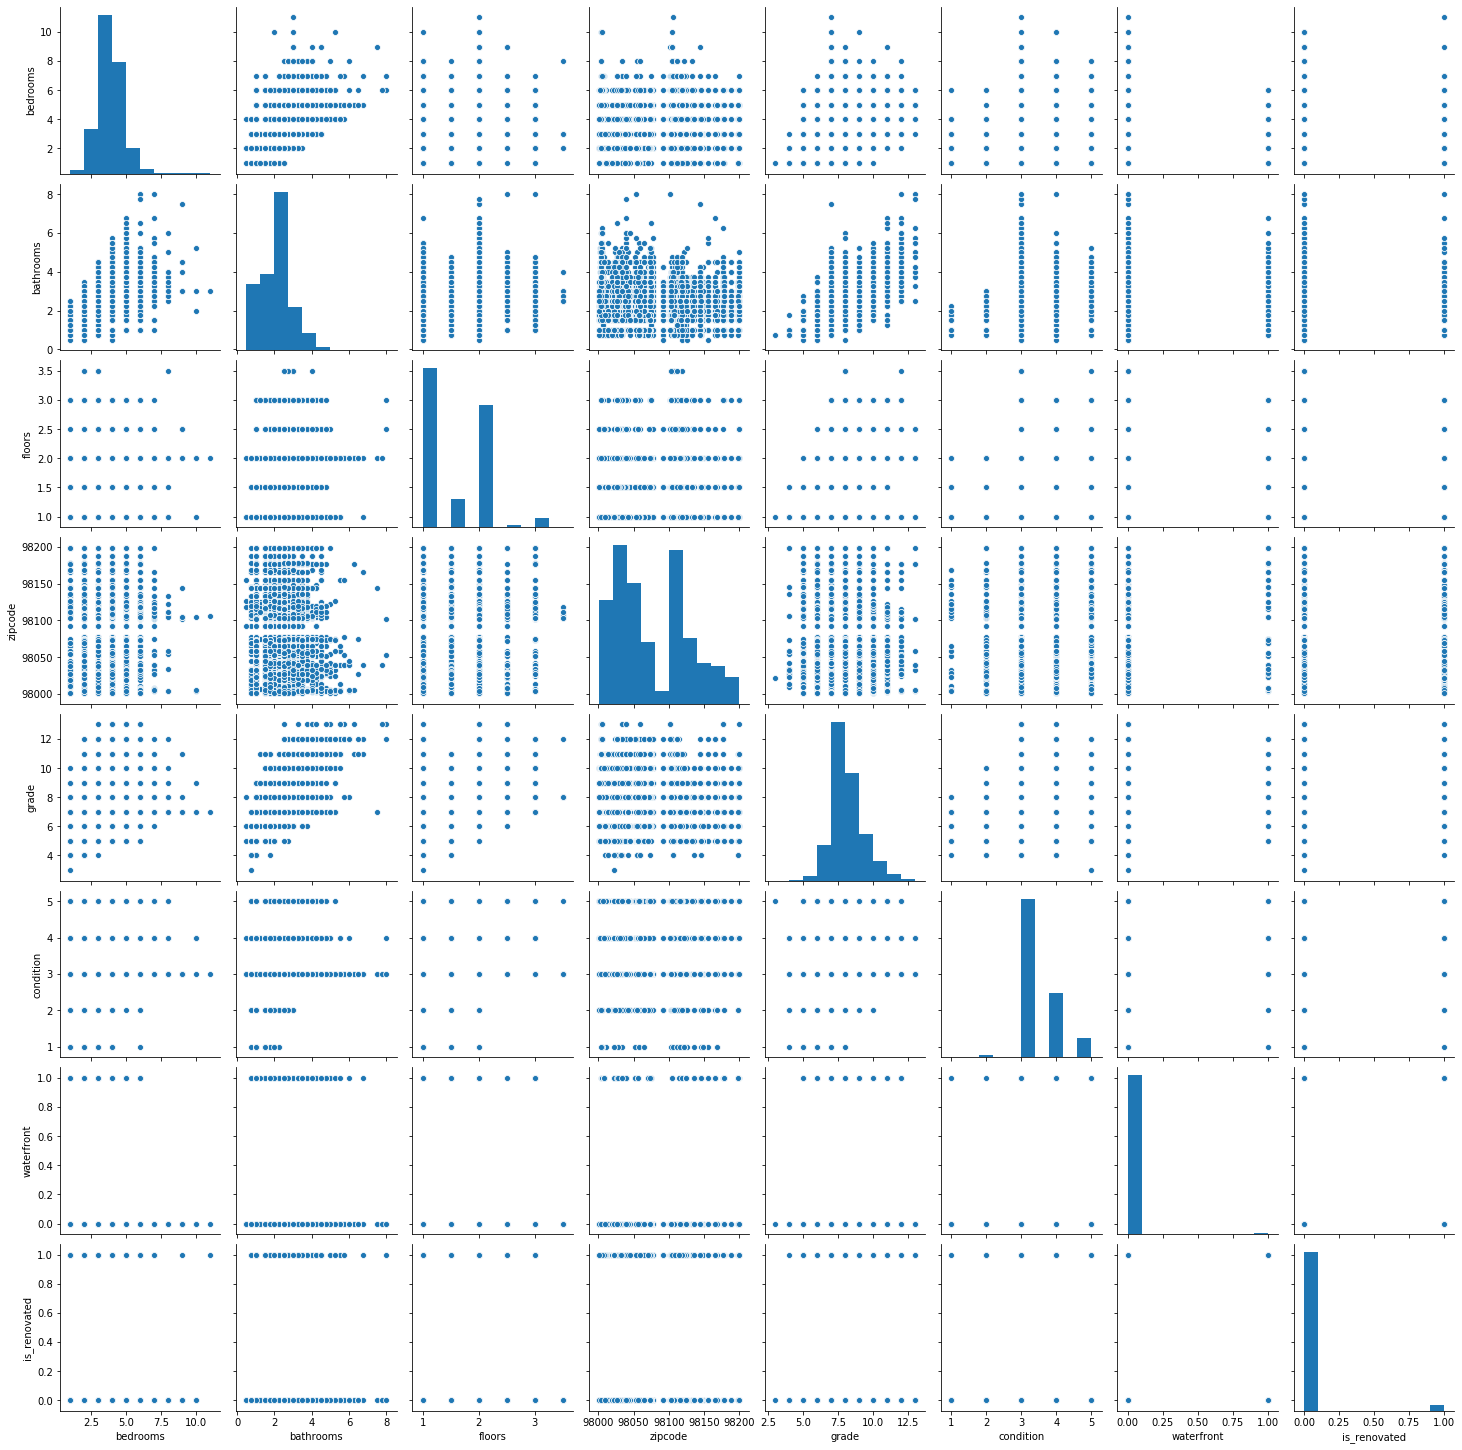

In [45]:
sns.pairplot(df[categorical]) #Plot categorical variables to do a visual check for linearity and normality

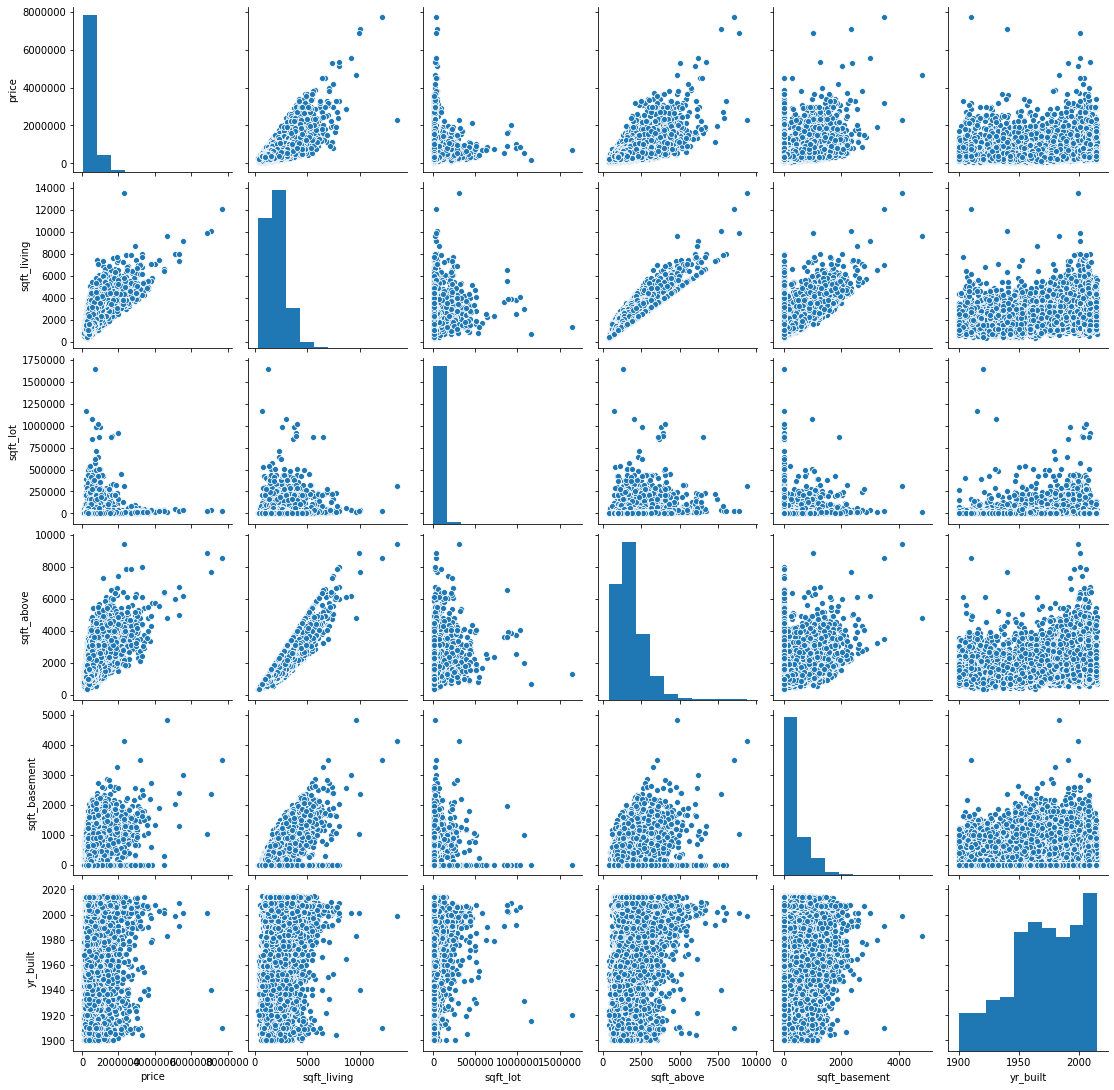

In [46]:
sns.pairplot(df[continuous]) #Plot continuous variables to do a visual check for linearity and normality

### Select Features for Model Based on Feature Correlation

In [47]:
corrr = df[continuous].corr() #Correlation Table for Continuous Variables
corrr

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
price,1.000000,0.701929,0.089879,0.605392,0.321103,0.053965
sqft_living,0.701929,1.000000,0.173449,0.876448,0.428683,0.318140
sqft_lot,0.089879,0.173449,1.000000,0.184134,0.015038,0.052939
sqft_above,0.605392,0.876448,0.184134,1.000000,-0.051149,0.424017
sqft_basement,0.321103,0.428683,0.015038,-0.051149,1.000000,-0.130063
yr_built,0.053965,0.318140,0.052939,0.424017,-0.130063,1.000000


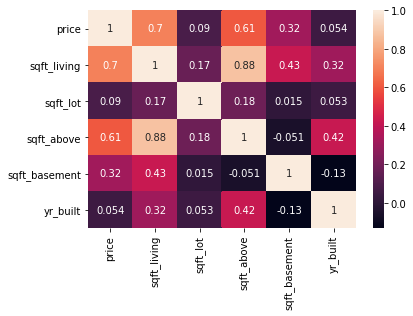

In [48]:
sns.heatmap(corrr, annot=True)  #heatmap with Correlations overlaid on features.
#Linearity: sqft living vs. sqft above,  
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [49]:
corrr_cat = df[categorical].corr() #Correlation Table for Categorical Variables
corrr_cat

,bedrooms,bathrooms,floors,zipcode,grade,condition,waterfront,is_renovated
bedrooms,1.000000,0.527870,0.183707,-0.158588,0.366174,0.023440,-0.002054,0.018354
bathrooms,0.527870,1.000000,0.502574,-0.204778,0.665834,-0.126443,0.063628,0.046738
floors,0.183707,0.502574,1.000000,-0.059522,0.458783,-0.264013,0.020794,0.003705
zipcode,-0.158588,-0.204778,-0.059522,1.000000,-0.185761,0.002835,0.028925,0.062383
grade,0.366174,0.665834,0.458783,-0.185761,1.000000,-0.146854,0.082817,0.015254
condition,0.023440,-0.126443,-0.264013,0.002835,-0.146854,1.000000,0.016659,-0.055369
waterfront,-0.002054,0.063628,0.020794,0.028925,0.082817,0.016659,1.000000,0.074267
is_renovated,0.018354,0.046738,0.003705,0.062383,0.015254,-0.055369,0.074267,1.000000


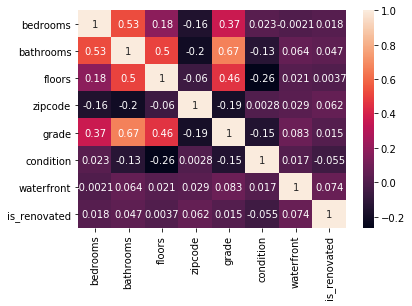

In [50]:
sns.heatmap(corrr_cat, annot=True)
#Linearity: sqft living vs. sqft above,  
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [51]:
df_cont = df[continuous] #Create a DataFarme for continuous data
df_cont.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,date
0,221900.0,1180,5650,1180,0.0,1955,2014-10-13
1,538000.0,2570,7242,2170,400.0,1951,2014-12-09
2,180000.0,770,10000,770,0.0,1933,2015-02-25
3,604000.0,1960,5000,1050,910.0,1965,2014-12-09
4,510000.0,1680,8080,1680,0.0,1987,2015-02-18


In [52]:
df_cont = df_cont.drop(['sqft_above'], axis=1) #sqrt living and above are collinear. Dropping sqrt_living because sqft_basement is included in the calculations for sqrt living


### Conduct Shapiro- Wilk Test & KS Test

In [53]:
#Perform Shapiro Test to check for normality

import warnings #Ignore all warnings
warnings.filterwarnings("ignore")

#Conduct Shapiro Test
from scipy import stats

norm_check = df_cont #create a dataframe norm_check to test feature scaling and normalization methods

#Convert DataFrame columns to numpy arrays in order to input into Shapiro and KS Test Functions
lot_arr = np.array(norm_check['sqft_lot'])
base_arr = np.array(norm_check['sqft_basement'])
built_arr = np.array(norm_check['yr_built'])
price_arr = np.array(norm_check['price'])



print('Shapiro Test sqft_lot: ', stats.shapiro(lot_arr))
print('Shapiro Test sqft_basement: ', stats.shapiro(base_arr))
print('Shapiro Test yr_built: ', stats.shapiro(built_arr))
print('Shapiro Test price: ', stats.shapiro(price_arr))
print('The p_values are less than 0.05 which tells us that the data is not normally distributed')

Shapiro Test sqft_lot:  (0.232710599899292, 0.0)
Shapiro Test sqft_basement:  (0.7031780481338501, 0.0)
Shapiro Test yr_built:  (0.9544544816017151, 0.0)
Shapiro Test price:  (0.7117679119110107, 0.0)
The p_values are less than 0.05 which tells us that the data is not normally distributed


In [54]:
#Conduct KS Test
print('KS Test sqft_lot: ', stats.kstest(lot_arr, 'norm'))
print('KS Test sqft_basement: ', stats.kstest(base_arr, 'norm'))
print('KS Test yr_built: ', stats.kstest(built_arr, 'norm'))
print('KS Test price: ', stats.kstest(price_arr, 'norm'))


KS Test sqft_lot:  KstestResult(statistic=1.0, pvalue=0.0)
KS Test sqft_basement:  KstestResult(statistic=0.5, pvalue=0.0)
KS Test yr_built:  KstestResult(statistic=1.0, pvalue=0.0)
KS Test price:  KstestResult(statistic=1.0, pvalue=0.0)


In [110]:
norm_check.to_csv(r'/Users/ericagabriel/Flatiron/dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/norm_check.csv', index=False)

## Part 3: Treating Outlier Data And Regression Modeling (Trials 1-5)

In this section, outlier data was treated to satisfy the linearity, normality, and homoscedasticity assumptions. Label encoding was used to to treat categorical variables. This method is preferred because it creates the least amount of features and multicollinarity between similar features. Then these treated datasets were used for building models and QQ Plots to observe model prediction accuracy.

Outliers were treated using:
* Scaling
* Normalization
* Quantile Trimming
* Mean Replacement 

### Feature Scaling & Normalization

#### Standardization

In [55]:
# Our P-value > 0.05, but we will make the data more normal to see how it impacts the model performance
#Standardization 
def norm_feat(series):
    return (series - series.mean())/series.std()
norm_check = norm_check.drop(['date'], axis=1)
for feat in norm_check.columns:
    df[feat] = norm_feat(df[feat])
df.describe()

norm_df = norm_feat(norm_check)
norm_df.head()


,price,sqft_living,sqft_lot,sqft_basement,yr_built
0,-0.866665,-0.980636,-0.228182,-0.649583,-0.544699
1,-0.006239,0.533324,-0.189741,0.259869,-0.680867
2,-0.980717,-1.427199,-0.123144,-0.649583,-1.293624
3,0.173414,-0.131075,-0.243877,1.419420,-0.204279
4,-0.082455,-0.436046,-0.169506,-0.649583,0.544646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b609f72e8>,
      dtype=object)

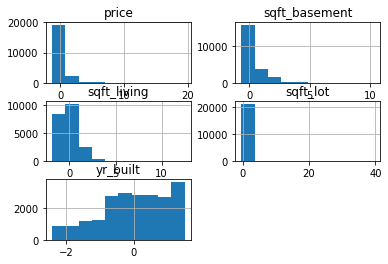

In [56]:
norm_df.hist()

In [109]:
norm_df.to_csv(r'/Users/ericagabriel/Flatiron/dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/norm_df.csv', index=False)

#### Mean Normalization

In [57]:
def mean_norm(series):
    return (series - series.mean()) / (series.max()- series.min())

top_feat = ['sqft_lot', 'sqft_basement', 'yr_built', 'price']
for feat in top_feat:
    df[feat] = mean_norm(df[feat])

mean_norm_df = mean_norm(norm_check)
mean_norm_df.head()




,price,sqft_living,sqft_lot,sqft_basement,yr_built
0,-0.041773,-0.068363,-0.005724,-0.059274,-0.139137
1,-0.000301,0.037180,-0.004760,0.023713,-0.173920
2,-0.047270,-0.099495,-0.003089,-0.059274,-0.330442
3,0.008358,-0.009138,-0.006118,0.129522,-0.052181
4,-0.003974,-0.030398,-0.004252,-0.059274,0.139124


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b6088a208>,
      dtype=object)

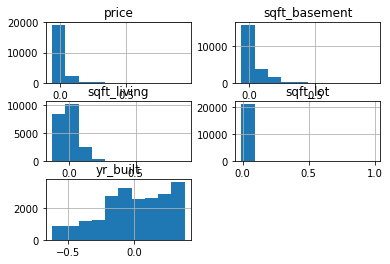

In [58]:
mean_norm_df.hist()

In [108]:
mean_norm_df.to_csv(r'/Users/ericagabriel/Flatiron/dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/mean_norm_df.csv', index=False)

#### Log Transformation

In [59]:
#Log Transformation
data_log = pd.DataFrame([])
data_log['loglot'] = np.log(norm_check['sqft_lot'])
data_log['logbase'] = np.log(norm_check['sqft_basement'])
data_log['logbuilt'] = np.log(norm_check['yr_built'])
data_log.head()
#Log Trans Produces '-inf' values, this will cause errors in our model
#data_log.hist();

,loglot,logbase,logbuilt
0,8.639411,-inf,7.578145
1,8.887653,5.991465,7.576097
2,9.210340,-inf,7.566828
3,8.517193,6.813445,7.583248
4,8.997147,-inf,7.594381


### Treating Categorical Data

In [61]:
#Treat categorical variables with Label Encoding
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
category_df = df[categorical]

cat_df = pd.DataFrame([])
cat_df['cond_dummy'] = lb_make.fit_transform(category_df.condition)
cat_df['grade_dummy'] = lb_make.fit_transform(category_df.grade)
cat_df['bed_dummy'] = lb_make.fit_transform(category_df.bedrooms)
cat_df['bath_dummy'] = lb_make.fit_transform(category_df.bathrooms)
cat_df['floor_dummy'] = lb_make.fit_transform(category_df.floors)
cat_df['zip_dummy'] = lb_make.fit_transform(category_df.zipcode)
cat_df['is_renovated'] = category_df['is_renovated']
cat_df.tail()


,cond_dummy,grade_dummy,bed_dummy,bath_dummy,floor_dummy,zip_dummy,is_renovated
21591,2,5,2,8,4,42,0.0
21592,2,5,3,8,2,60,0.0
21593,2,4,1,1,2,59,0.0
21594,2,5,2,8,2,15,0.0
21595,2,4,1,1,2,59,0.0


In [62]:
cat_df['is_renovated'] = cat_df['is_renovated'].fillna(0.0)

In [63]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 7 columns):
cond_dummy      21596 non-null int64
grade_dummy     21596 non-null int64
bed_dummy       21596 non-null int64
bath_dummy      21596 non-null int64
floor_dummy     21596 non-null int64
zip_dummy       21596 non-null int64
is_renovated    21596 non-null float64
dtypes: float64(1), int64(6)
memory usage: 1.2 MB


### Model Building: Trial 1 with Label Encoded Data & Standardized Continuous Data

In [64]:
#Combine Categorical and Continuous data into one dataframe

complete_df = pd.concat([cat_df, norm_df], axis=1) #drop the padded zero column that was justed to combine the 2 dataframes
complete_df.head()


,cond_dummy,grade_dummy,bed_dummy,bath_dummy,floor_dummy,zip_dummy,is_renovated,price,sqft_living,sqft_lot,sqft_basement,yr_built
0,2.0,4.0,2.0,2.0,0.0,66.0,0.0,-0.866665,-0.980636,-0.228182,-0.649583,-0.544699
1,2.0,4.0,2.0,7.0,2.0,55.0,1.0,-0.006239,0.533324,-0.189741,0.259869,-0.680867
2,2.0,3.0,1.0,2.0,0.0,16.0,0.0,-0.980717,-1.427199,-0.123144,-0.649583,-1.293624
3,4.0,4.0,3.0,10.0,0.0,58.0,0.0,0.173414,-0.131075,-0.243877,1.419420,-0.204279
4,2.0,5.0,2.0,6.0,0.0,37.0,0.0,-0.082455,-0.436046,-0.169506,-0.649583,0.544646


In [83]:
complete_df.columns

Index(['cond_dummy', 'grade_dummy', 'bed_dummy', 'bath_dummy', 'floor_dummy',
       'zip_dummy', 'is_renovated', 'price', 'sqft_living', 'sqft_lot',
       'sqft_basement', 'yr_built'],
      dtype='object')

In [107]:
complete_df.to_csv(r'/Users/ericagabriel/Flatiron/dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/complete_df.csv', index=False)

       cond_dummy  grade_dummy  bed_dummy  bath_dummy  floor_dummy  zip_dummy  \
0             2.0          4.0        2.0         2.0          0.0       66.0   
1             2.0          4.0        2.0         7.0          2.0       55.0   
2             2.0          3.0        1.0         2.0          0.0       16.0   
3             4.0          4.0        3.0        10.0          0.0       58.0   
4             2.0          5.0        2.0         6.0          0.0       37.0   
...           ...          ...        ...         ...          ...        ...   
21592         2.0          5.0        3.0         8.0          2.0       60.0   
21593         2.0          4.0        1.0         1.0          2.0       59.0   
21594         2.0          5.0        2.0         8.0          2.0       15.0   
21595         2.0          4.0        1.0         1.0          2.0       59.0   
21596         NaN          NaN        NaN         NaN          NaN        NaN   

       is_renovated  sqft_l

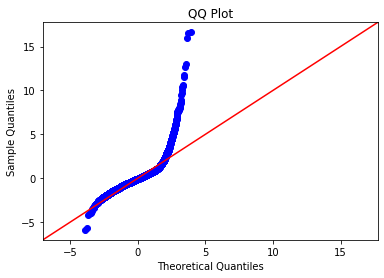

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     2598.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:06:05   Log-Likelihood:                -21535.
No. Observations:               21595   AIC:                         4.309e+04
Df Residuals:                   21583   BIC:                         4.319e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8026      0.034    -23.921      0.000      -0.868      -0.737
cond_dummy        0.0688      0.007      9.267      0.000       0.054       0.083
grade_dummy       0.1915      0.006     34.612      0.000       0.181       0.202
bed_dummy        -0.1450      0.006    -24.003      0.000      -0.157      -0.133
bath_dummy        0.0057      0.002      2.407      0.016       0.001       0.010
floor_dummy       0.0144      0.005      2.641      0.008       0.004       0.025
zip_dummy         0.0009      0.000      3.509      0.000       0.000       0.001
is_renovated      0.2041      0.026      8.000      0.000       0.154       0.254
sqft_living       0.7004      0.007    105.613      0.000       0.687       0.713
sqft_lot         -0.0371      0.005     -8.107      0.000      -0.046      -0.028
sqft_basement    -0.0126      0.006     -2.247      0.025      -0.024      -0.002
yr_built         -0.2230      0.006    -38.427      0.000      -0.234      -0.212
==============================================================================
Omnibus:                    15095.439   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           634087.677
Skew:                           2.858   Prob(JB):                         0.00
Kurtosis:                      28.924   Cond. No.                         313.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import scipy.stats as stats
def fullRegressionAnalysis(b, df, a='price'):
    '''a: str Dependent variable column name
        b: List of str Independent variable columns
        df: dataframe Dataframe to analyze
        
        First line of regression analysis between the dependent variable and a single independent variable in a dataFrame
    
        Returns
        R-squared value
        Intercept
        Slope
        P-Value
        JB Score & Probability of JB
        Statistical signfigance
        Rejection of normal distribution of errors
        Scatter plot with Line of Best Fit
        Regression plots for column2 vs. model
        QQ plot
        Model Summary Statistics'''

    
    b = df.drop(a, axis=1)
    pred_sum = '+'.join(b.columns)
    f = a+'~'+pred_sum
    model = ols(formula=f, data=df).fit()
    print (b, 'vs.', a)
    print ('R-Squared:',model.rsquared)
    print ('Intercept:',model.params[0])
    print ('Slope:',model.params[1])
    print ('P-Value:',round(model.pvalues[1],4))
    print ('JB Score:',sms.jarque_bera(model.resid)[0], 'Probability:', sms.jarque_bera(model.resid)[1])
    if model.pvalues[1] <= 0.05:
        print('  *',b,'HAS a statistically significant relationship to',a)
    else:
        print('  *',b,'DOES NOT HAVE a statistically significant relationship to',a)
    if sms.jarque_bera(model.resid)[0] >= 6 and sms.jarque_bera(model.resid)[1] <= 0.05:
        print('  * We REJECT the normal distribution of the model errors')
     
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title('QQ Plot')
    plt.show()    
    return model.summary()


a = 'price'
b = ['cond_dummy', 'grade_dummy', 'bed_dummy', 'bath_dummy', 'floor_dummy',
       'zip_dummy', 'is_renovated', 'price', 'sqft_living', 'sqft_lot',
       'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=complete_df)

### Model Building: Trial 2 with Mean Normalized Continuous Data

       sqft_living  sqft_lot  sqft_basement  yr_built
0        -0.068363 -0.005724      -0.059274 -0.139137
1         0.037180 -0.004760       0.023713 -0.173920
2        -0.099495 -0.003089      -0.059274 -0.330442
3        -0.009138 -0.006118       0.129522 -0.052181
4        -0.030398 -0.004252      -0.059274  0.139124
...            ...       ...            ...       ...
21592    -0.041788 -0.008462      -0.059274  0.330428
21593     0.017438 -0.005626      -0.059274  0.373906
21594    -0.080512 -0.008329      -0.059274  0.330428
21595    -0.036473 -0.007700      -0.059274  0.286950
21596    -0.080512 -0.008495      -0.059274  0.321732

[21596 rows x 4 columns] vs. price
R-Squared: 0.5270833940010822
Intercept: 4.87890977618477e-18
Slope: 0.5468669802895156
P-Value: 0.0
JB Score: 511419.69662194606 Probability: 0.0
  *        sqft_living  sqft_lot  sqft_basement  yr_built
0        -0.068363 -0.005724      -0.059274 -0.139137
1         0.037180 -0.004760       0.023713 -0.173920
2  

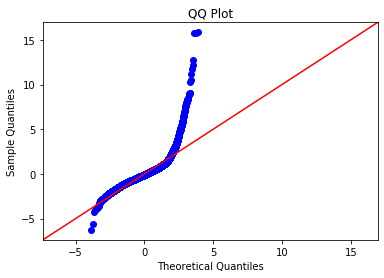

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     6016.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:09:02   Log-Likelihood:                 42931.
No. Observations:               21596   AIC:                        -8.585e+04
Df Residuals:                   21591   BIC:                        -8.581e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.879e-18      0.000   2.16e-14      1.000      -0.000       0.000
sqft_living       0.5469      0.004    136.529      0.000       0.539       0.555
sqft_lot         -0.0692      0.009     -7.555      0.000      -0.087      -0.051
sqft_basement    -0.0230      0.003     -7.984      0.000      -0.029      -0.017
yr_built         -0.0380      0.001    -38.769      0.000      -0.040      -0.036
==============================================================================
Omnibus:                    14374.742   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           511419.697
Skew:                           2.707   Prob(JB):                         0.00
Kurtosis:                      26.217   Cond. No.                         40.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
a = 'price'
b = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=mean_norm_df)

### Model Building: Trial 3 with Standardized Continuous Data

       sqft_living  sqft_lot  sqft_basement  yr_built
0        -0.980636 -0.228182      -0.649583 -0.544699
1         0.533324 -0.189741       0.259869 -0.680867
2        -1.427199 -0.123144      -0.649583 -1.293624
3        -0.131075 -0.243877       1.419420 -0.204279
4        -0.436046 -0.169506      -0.649583  0.544646
...            ...       ...            ...       ...
21592    -0.599423 -0.337301      -0.649583  1.293570
21593     0.250138 -0.224246      -0.649583  1.463780
21594    -1.154904 -0.332013      -0.649583  1.293570
21595    -0.523180 -0.306949      -0.649583  1.123360
21596    -1.154904 -0.338629      -0.649583  1.259528

[21596 rows x 4 columns] vs. price
R-Squared: 0.5270833940010822
Intercept: 9.020562075079397e-17
Slope: 0.7909599234808902
P-Value: 0.0
JB Score: 511419.6966219478 Probability: 0.0
  *        sqft_living  sqft_lot  sqft_basement  yr_built
0        -0.980636 -0.228182      -0.649583 -0.544699
1         0.533324 -0.189741       0.259869 -0.680867
2  

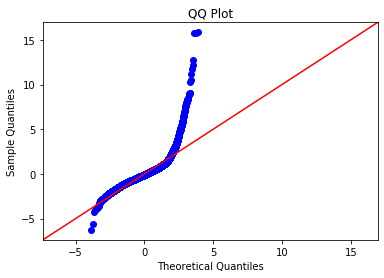

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     6016.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:09:17   Log-Likelihood:                -22557.
No. Observations:               21596   AIC:                         4.512e+04
Df Residuals:                   21591   BIC:                         4.516e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.021e-17      0.005   1.93e-14      1.000      -0.009       0.009
sqft_living       0.7910      0.006    136.529      0.000       0.780       0.802
sqft_lot         -0.0360      0.005     -7.555      0.000      -0.045      -0.027
sqft_basement    -0.0436      0.005     -7.984      0.000      -0.054      -0.033
yr_built         -0.2014      0.005    -38.769      0.000      -0.212      -0.191
==============================================================================
Omnibus:                    14374.742   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           511419.697
Skew:                           2.707   Prob(JB):                         0.00
Kurtosis:                      26.217   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
a = 'price'
b = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=norm_df)

### Model Building: Trial 4 with Label encoded Categorical Variables and Non Normalized or Scaled Data

In [95]:
nonnorm_complete = pd.concat([cat_df, norm_check], axis=1)
nonnorm_complete.head()

,cond_dummy,grade_dummy,bed_dummy,bath_dummy,floor_dummy,zip_dummy,is_renovated,price,sqft_living,sqft_lot,sqft_basement,yr_built
0,2.0,4.0,2.0,2.0,0.0,66.0,0.0,221900.0,1180.0,5650.0,0.0,1955.0
1,2.0,4.0,2.0,7.0,2.0,55.0,1.0,538000.0,2570.0,7242.0,400.0,1951.0
2,2.0,3.0,1.0,2.0,0.0,16.0,0.0,180000.0,770.0,10000.0,0.0,1933.0
3,4.0,4.0,3.0,10.0,0.0,58.0,0.0,604000.0,1960.0,5000.0,910.0,1965.0
4,2.0,5.0,2.0,6.0,0.0,37.0,0.0,510000.0,1680.0,8080.0,0.0,1987.0


In [96]:
nonnorm_complete = nonnorm_complete.drop(21596, axis=0)
nonnorm_complete.head()

,cond_dummy,grade_dummy,bed_dummy,bath_dummy,floor_dummy,zip_dummy,is_renovated,price,sqft_living,sqft_lot,sqft_basement,yr_built
0,2.0,4.0,2.0,2.0,0.0,66.0,0.0,221900.0,1180.0,5650.0,0.0,1955.0
1,2.0,4.0,2.0,7.0,2.0,55.0,1.0,538000.0,2570.0,7242.0,400.0,1951.0
2,2.0,3.0,1.0,2.0,0.0,16.0,0.0,180000.0,770.0,10000.0,0.0,1933.0
3,4.0,4.0,3.0,10.0,0.0,58.0,0.0,604000.0,1960.0,5000.0,910.0,1965.0
4,2.0,5.0,2.0,6.0,0.0,37.0,0.0,510000.0,1680.0,8080.0,0.0,1987.0


In [105]:
nonnorm_complete.to_csv(r'/Users/ericagabriel/Flatiron/dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/nonnorm_complete.csv', index=False)

       cond_dummy  grade_dummy  bed_dummy  bath_dummy  floor_dummy  zip_dummy  \
0             2.0          4.0        2.0         2.0          0.0       66.0   
1             2.0          4.0        2.0         7.0          2.0       55.0   
2             2.0          3.0        1.0         2.0          0.0       16.0   
3             4.0          4.0        3.0        10.0          0.0       58.0   
4             2.0          5.0        2.0         6.0          0.0       37.0   
...           ...          ...        ...         ...          ...        ...   
21591         2.0          5.0        2.0         8.0          4.0       42.0   
21592         2.0          5.0        3.0         8.0          2.0       60.0   
21593         2.0          4.0        1.0         1.0          2.0       59.0   
21594         2.0          5.0        2.0         8.0          2.0       15.0   
21595         2.0          4.0        1.0         1.0          2.0       59.0   

       is_renovated  sqft_l

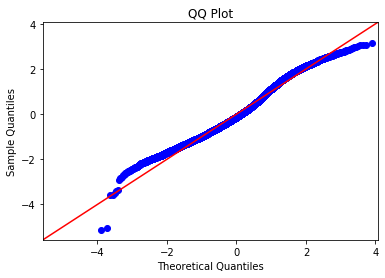

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     480.0
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:25:26   Log-Likelihood:            -2.8197e+05
No. Observations:               21595   AIC:                         5.640e+05
Df Residuals:                   21583   BIC:                         5.641e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.071e+06   6.79e+04     15.769      0.000    9.38e+05     1.2e+06
cond_dummy     1.057e+04   1283.629      8.235      0.000    8054.100    1.31e+04
grade_dummy    1.734e+04    955.826     18.145      0.000    1.55e+04    1.92e+04
bed_dummy     -1002.5911   1046.616     -0.958      0.338   -3054.036    1048.853
bath_dummy     -407.2629    412.915     -0.986      0.324   -1216.606     402.081
floor_dummy    2404.4021    994.903      2.417      0.016     454.318    4354.486
zip_dummy       258.0316     43.289      5.961      0.000     173.181     342.882
is_renovated  -1725.6217   4407.749     -0.391      0.695   -1.04e+04    6913.892
sqft_living      48.0468      1.288     37.317      0.000      45.523      50.570
sqft_lot         -8.7369      0.358    -24.411      0.000      -9.438      -8.035
sqft_basement     5.2982      2.215      2.392      0.017       0.957       9.640
yr_built       -409.9742     34.135    -12.011      0.000    -476.880    -343.068
==============================================================================
Omnibus:                      592.325   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.825
Skew:                           0.377   Prob(JB):                    1.86e-129
Kurtosis:                       2.700   Cond. No.                     6.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
a = 'price'
b = ['cond_dummy', 'grade_dummy', 'bed_dummy', 'bath_dummy', 'floor_dummy',
       'zip_dummy', 'is_renovated', 'price', 'sqft_living', 'sqft_lot',
       'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=nonnorm_complete)

### Model Trial 5 using Outlier Trimming

In [73]:
#Remove values that are less than the 35th quantile and above the 65th quantile


Q35 = norm_check.quantile(.35) #Calculate the 35th percentile 
Q65 = norm_check.quantile(.65) #Calculate the 65th percentile 
IQR = Q65 - Q35
print(IQR)


#Trim Outliers by IQR Score
cont_trim_df = norm_check[~((norm_check < (Q35 - 1.5 * IQR)) |(norm_check > (Q65 + 1.5 * IQR))).any(axis=1)]
print(cont_trim_df.shape)




price            180000.00
sqft_living         643.75
sqft_lot           3056.00
sqft_basement       250.00
yr_built             27.00
dtype: float64
(11059, 5)


In [74]:
#Replace Outliers in Price and Sqft_lot with the Median
print(norm_check['price'].quantile(0.50)) #Print the median
print(norm_check['price'].quantile(0.85)) #Print the 85th percentile
norm_check['price'] = np.where(norm_check['price'] > 703942.5, 450000.0, norm_check['price']) #Replace values greater than the 95th percentile with the median value


print(norm_check['sqft_lot'].quantile(0.50)) #Print the median
print(norm_check['sqft_lot'].quantile(0.85)) #Print the 85th percentile
norm_check['sqft_lot'] = np.where(norm_check['sqft_lot'] > 12182.25, 7618.5, norm_check['sqft_lot']) #Replace values greater than the 95th percentile with the median value


450000.0
779807.5
7619.0
15000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b4abe65c0>,
      dtype=object)

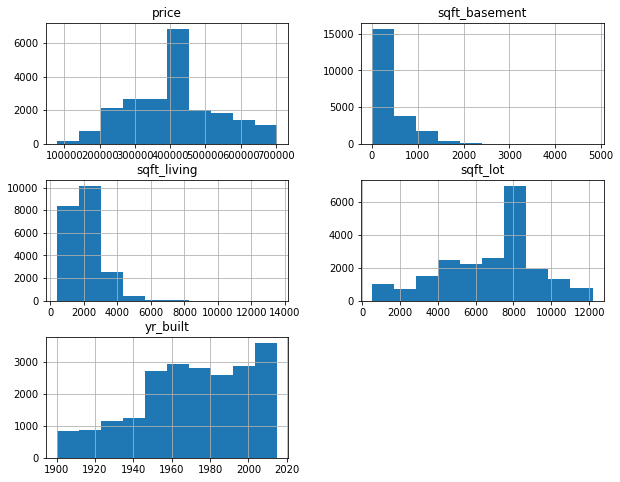

In [114]:
norm_check.hist(figsize=(10,8))

In [106]:
cont_trim_df.to_csv(r'/Users/ericagabriel/Flatiron/dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/cont_trim_df.csv', index=False)

       sqft_living  sqft_lot  sqft_basement  yr_built
0             1180      5650            0.0      1955
1             2570      7242          400.0      1951
2              770     10000            0.0      1933
4             1680      8080            0.0      1987
6             1715      6819            0.0      1995
...            ...       ...            ...       ...
21586         1500     11968            0.0      2014
21587         2270      5536            0.0      2003
21589         2520      6023            0.0      2014
21593         2310      5813            0.0      2014
21595         1600      2388            0.0      2004

[11059 rows x 4 columns] vs. price
R-Squared: 0.32920983789239755
Intercept: 3625756.4002070464
Slope: 185.00186477727487
P-Value: 0.0
JB Score: 315.28589712155326 Probability: 3.439832766494762e-69
  *        sqft_living  sqft_lot  sqft_basement  yr_built
0             1180      5650            0.0      1955
1             2570      7242          40

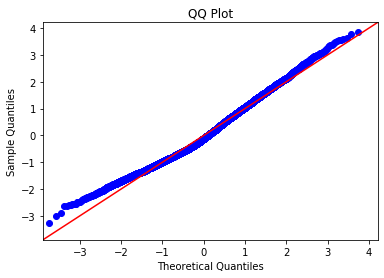

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     1356.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:34:40   Log-Likelihood:            -1.4585e+05
No. Observations:               11059   AIC:                         2.917e+05
Df Residuals:                   11054   BIC:                         2.917e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.626e+06    1.2e+05     30.211      0.000    3.39e+06    3.86e+06
sqft_living     185.0019      2.647     69.897      0.000     179.814     190.190
sqft_lot        -10.7388      0.478    -22.469      0.000     -11.676      -9.802
sqft_basement    27.9675      7.037      3.974      0.000      14.174      41.761
yr_built      -1755.1172     61.657    -28.466      0.000   -1875.976   -1634.259
==============================================================================
Omnibus:                      294.524   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.286
Skew:                           0.407   Prob(JB):                     3.44e-69
Kurtosis:                       2.858   Cond. No.                     7.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
a = 'price'
b = ['cond_dummy', 'grade_dummy', 'bed_dummy', 'bath_dummy', 'floor_dummy', 'zip_dummy','is_renovated', 'sqft_lot', 'sqft_basement', 'yr_built']

fullRegressionAnalysis(a=a, b=b, df=cont_trim_df )